# <u> **Customer Churn Analysis** </u>

This project is to do with churn analysis, which is essentially the rate at which customers stop doing or engaging in business with a company over a given period of time.

Churn analysis is important for businesses and organizations for several reasons:

`Revenue Protection`
> Churn can have a significant negative impact on a company's revenue. When customers leave or stop using a product or service, it results in lost sales and recurring revenue. Churn analysis helps identify the causes of churn so that businesses can take proactive steps to reduce it and protect their revenue streams.

`Cost Reduction`
> Acquiring new customers is typically more expensive than retaining existing ones. Churn analysis can help businesses pinpoint the reasons why customers are leaving and allocate resources more efficiently to reduce churn. By addressing the root causes, companies can save on marketing and customer acquisition costs.



`Customer Experience Improvement`
> Understanding why customers churn provides valuable insights into the weaknesses and pain points in your products or services. This information can be used to enhance the customer experience, improve product quality, and provide better customer support.

`Long-Term Sustainability`
> Reducing churn can contribute to the long-term sustainability of a business. High churn rates can be a sign of underlying issues that, if left unaddressed, can lead to the decline or failure of a company. Churn analysis helps identify these issues early on and allows for strategic adjustments.

`Data-Driven Decision-Making`
> Churn analysis relies on data and analytics, making it a valuable tool for data-driven decision-making. It helps businesses move away from guesswork and intuition by providing concrete insights into customer behavior and preferences.

`Customer Segmentation`
> Churn analysis can reveal patterns and trends among different customer segments. This allows businesses to tailor their retention strategies to specific groups of customers, increasing the likelihood of success.

`Competitive Advantage`
> Businesses that can effectively reduce churn are often more competitive in the market. Satisfied and loyal customers are more likely to refer others to your business and provide positive reviews, helping to attract new customers and maintain a competitive edge.

<p>&nbsp;</p>

*In summary, churn analysis is important because it helps businesses protect their revenue, reduce costs, enhance the customer experience, gain a competitive edge, and make informed, data-driven decisions to ensure long-term sustainability and growth. Below is a churn analysis from over 5000 customer data entries.*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
from matplotlib import pyplot as plt
import scipy
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from collections import Counter
from imblearn.combine import SMOTEENN
plt.style.use('default')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Example: GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Lab materials 01-20210104'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Churn_analysis'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

df = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, 'WA_Fn-UseC_-Telco-Customer-Churn.csv'))
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['WA_Fn-UseC_-Telco-Customer-Churn.csv', 'Customer_churn_analysis.ipynb']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df[df.duplicated()].shape[0]

0

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#since customerId is not required for prediction so drop it
df.drop('customerID', axis=1, inplace=True)

In [ ]:
#since total changes is having numerical value but dtype is object to change it into numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

## Exploratory Data Analysis  (EDA):

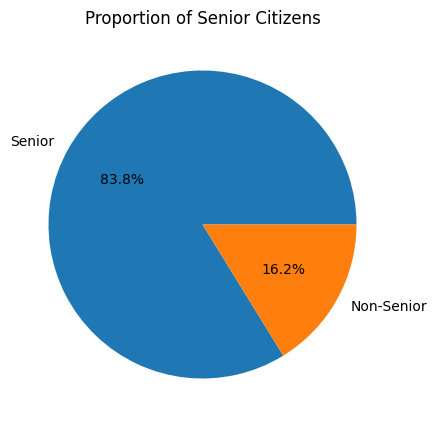

In [ ]:
#pie chart to count senior citizen
plt.figure(figsize=(10,5))
plt.title('Proportion of Senior Citizens')
plt.pie(df["SeniorCitizen"].value_counts(), autopct="%.1f%%", labels=["Senior","Non-Senior"])
plt.show()

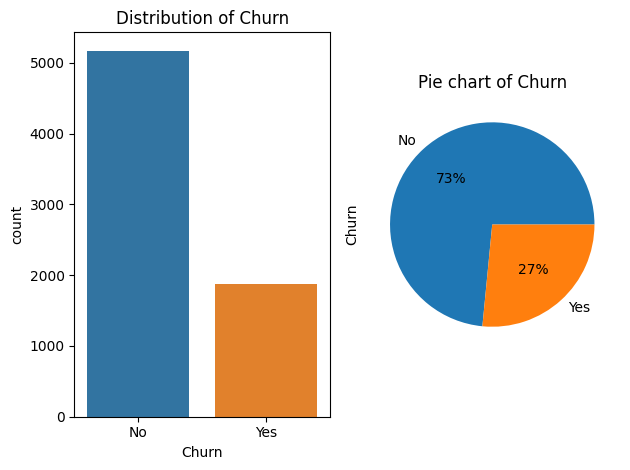

In [ ]:
#check the distibution of churn class
plt.subplot(121)
sns.countplot(data=df, x="Churn")
plt.title("Distribution of Churn")
plt.subplot(122)
df['Churn'].value_counts().plot(kind='pie', autopct="%1.f%%", labels=['No','Yes'])
plt.title('Pie chart of Churn')
plt.tight_layout()
plt.show()

In [ ]:
#perentage of each class sample distribution
churned = df[df["Churn"] == "Yes"]
not_churned = df[df["Churn"] == "No"]
print(f"Customer Churn : {np.round((len(churned)/len(df)*100), decimals=2)}%")
print(f"Customer Not Churn : {np.round((len(not_churned)/len(df)*100), decimals=2)}%")

Customer Churn : 26.54%
Customer Not Churn : 73.46%


In [ ]:
#how much loss we are having because of customer churn
loss = churned["TotalCharges"].sum()
total_revenue = df["TotalCharges"].sum()

print(f"We have lost arround ${loss} due to customer churn")
print(f"We have lost arround {np.round(loss/total_revenue*100, decimals=2)}% of revenue due to customer churn")

We have lost arround $2862926.9 due to customer churn
We have lost arround 17.83% of revenue due to customer churn


----
###<center><b> Tenure, Monthly Charges and Total Charges Churn Histograms </b></center>
----

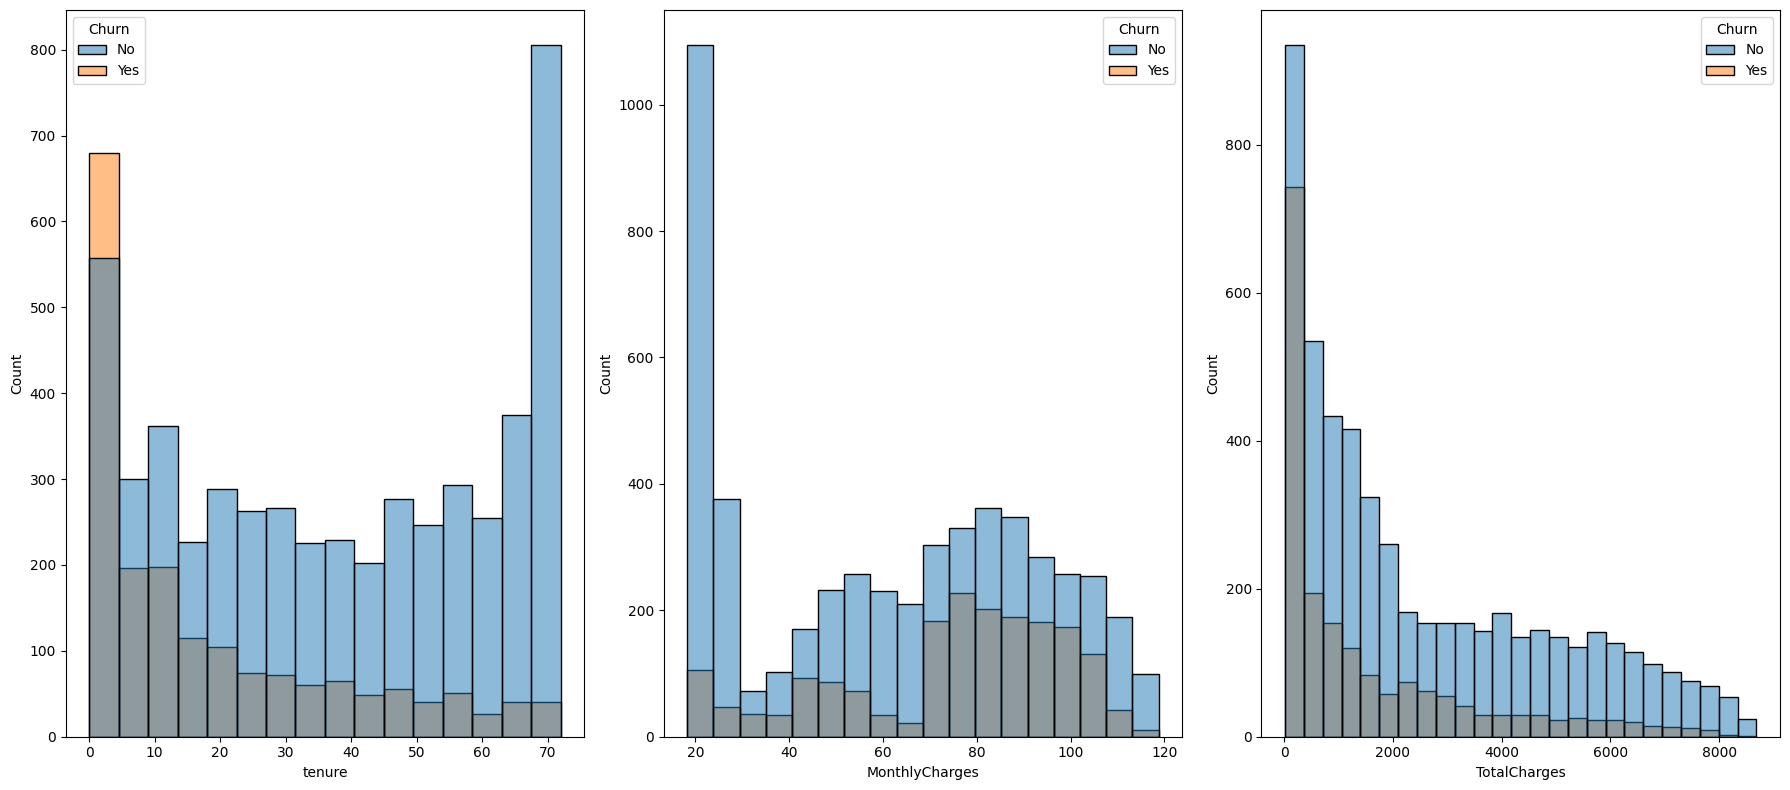

In [ ]:
#plot numerical features with histogram
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,8))
axes = axs.flatten()
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for i, col in enumerate(num_features):
  if(col != 'SeniorCitizen'):
    sns.histplot(x=col, data=df, hue='Churn', ax=axes[i])
fig.tight_layout()
plt.show()

----
###<center><b> Tenure, Monthly Charges and Total Charges Churn Boxplots </b></center>
----

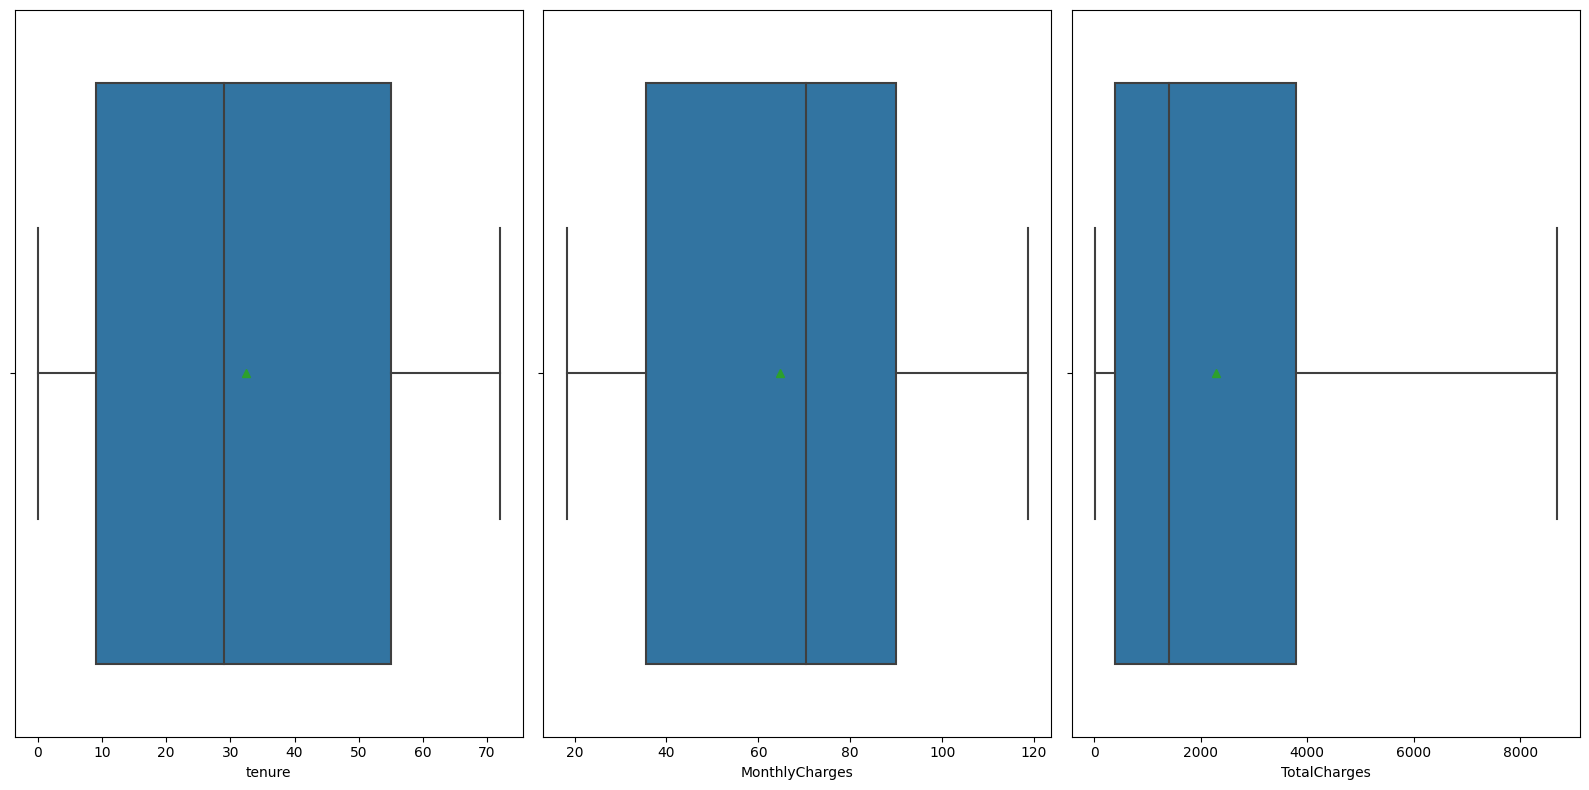

In [ ]:
#plot numerical features with boxplot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16,8))
axes = axs.flatten()
for i, col in enumerate(num_features):
  if(col != 'SeniorCitizen'):
    sns.boxplot(x=col, data=df, showmeans=True, ax=axes[i])
fig.tight_layout()
plt.show()

`[From the Histograms and Boxplots above, we can see that there is no outlier present in numeric dataset so we don't need to do any kind of outlier treatment]`

----
###<center><b> Tenure, Monthly Charges and Total Charges Churn Scatter Pairplots </b></center>
----

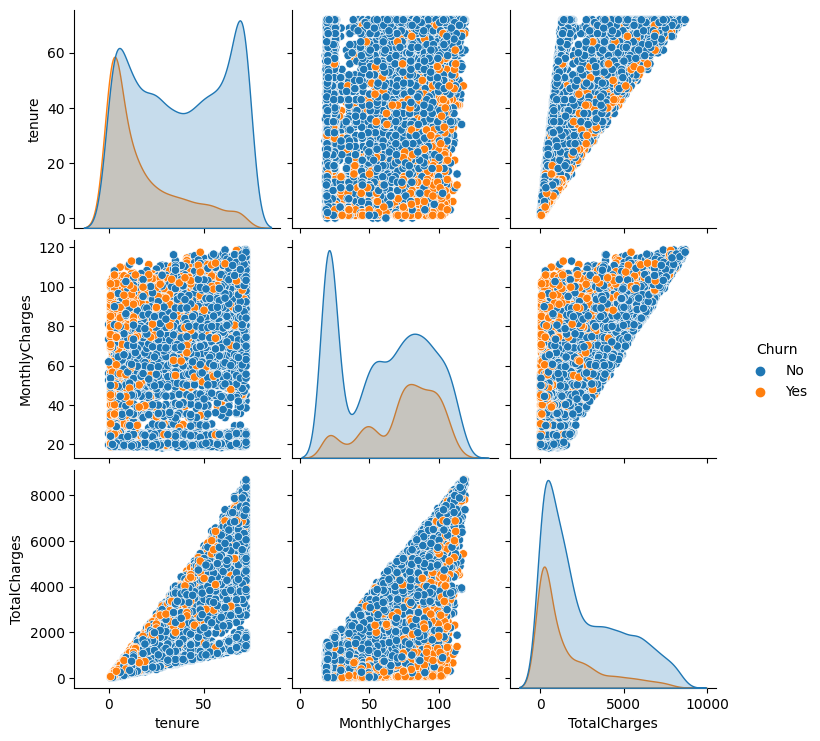

In [ ]:
sns.pairplot(df.drop(columns="SeniorCitizen"), hue="Churn", kind="scatter")
plt.show()

----
###<center><b> Univariate Analysis </b></center>
----

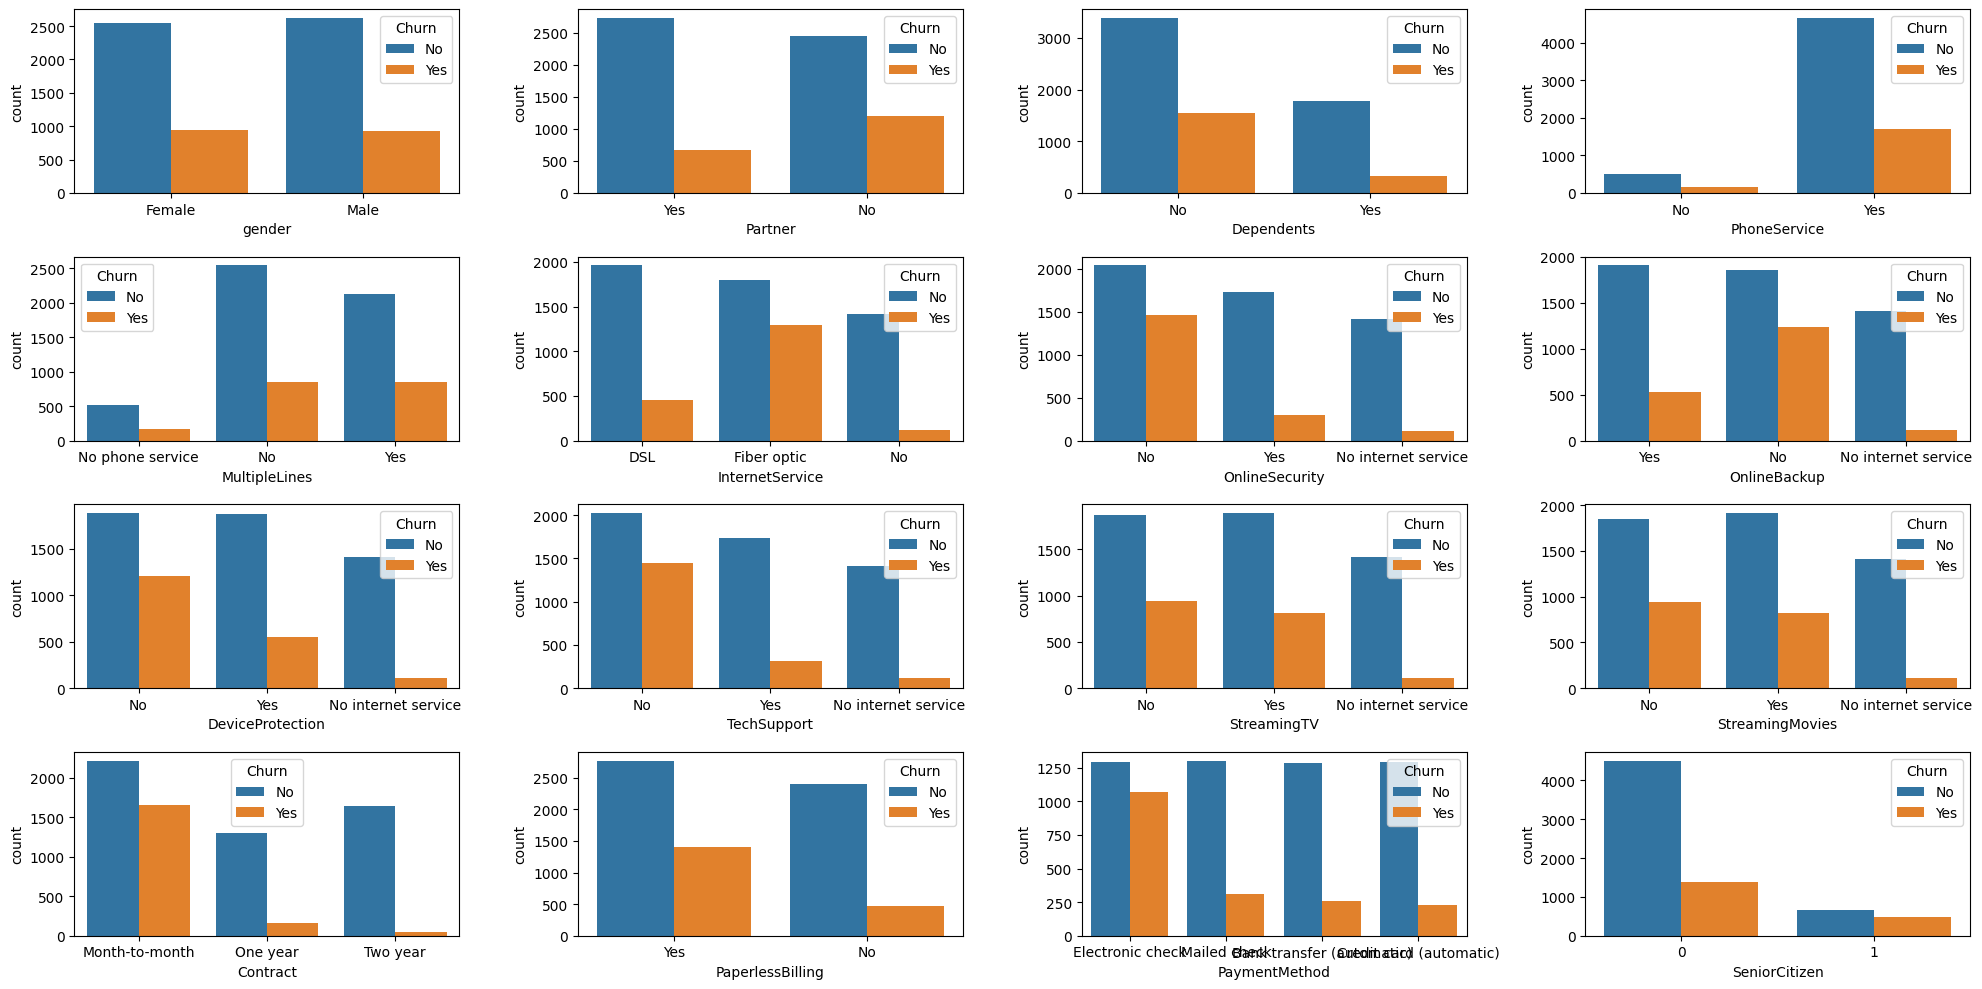

In [ ]:
#plot cateogrical features :
categorical_features = list(df.select_dtypes(include='object').columns)
categorical_features.remove('Churn')
categorical_features.append('SeniorCitizen')

fig,axs = plt.subplots(nrows=4, ncols=4, figsize=(20,10))
axes = axs.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, hue="Churn", data=df, ax=axes[i])

fig.tight_layout()
plt.show()

## Data Cleaning and Preprocessing:


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#check for null values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
#encoding categorical values into numeric using label encoder
encoder = LabelEncoder()
for feature in df.select_dtypes(include='object').columns:
    df[feature] = encoder.fit_transform(df[feature])

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

----
###<center><b> Categorical Variables Churn Correlation Bar Chart</b></center>
----

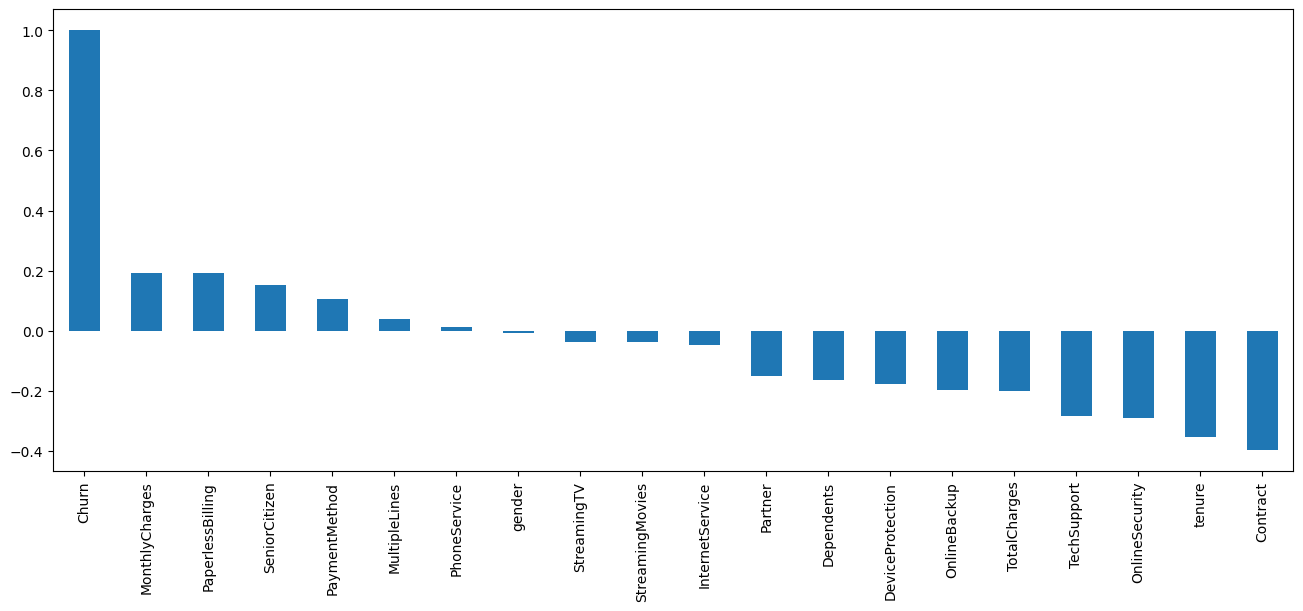

In [ ]:
#get correlation of churn with other variables
plt.figure(figsize=(16,6))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.show()

----
###<center><b> Categorical Variables Churn Correlation Heatmap</b></center>
----

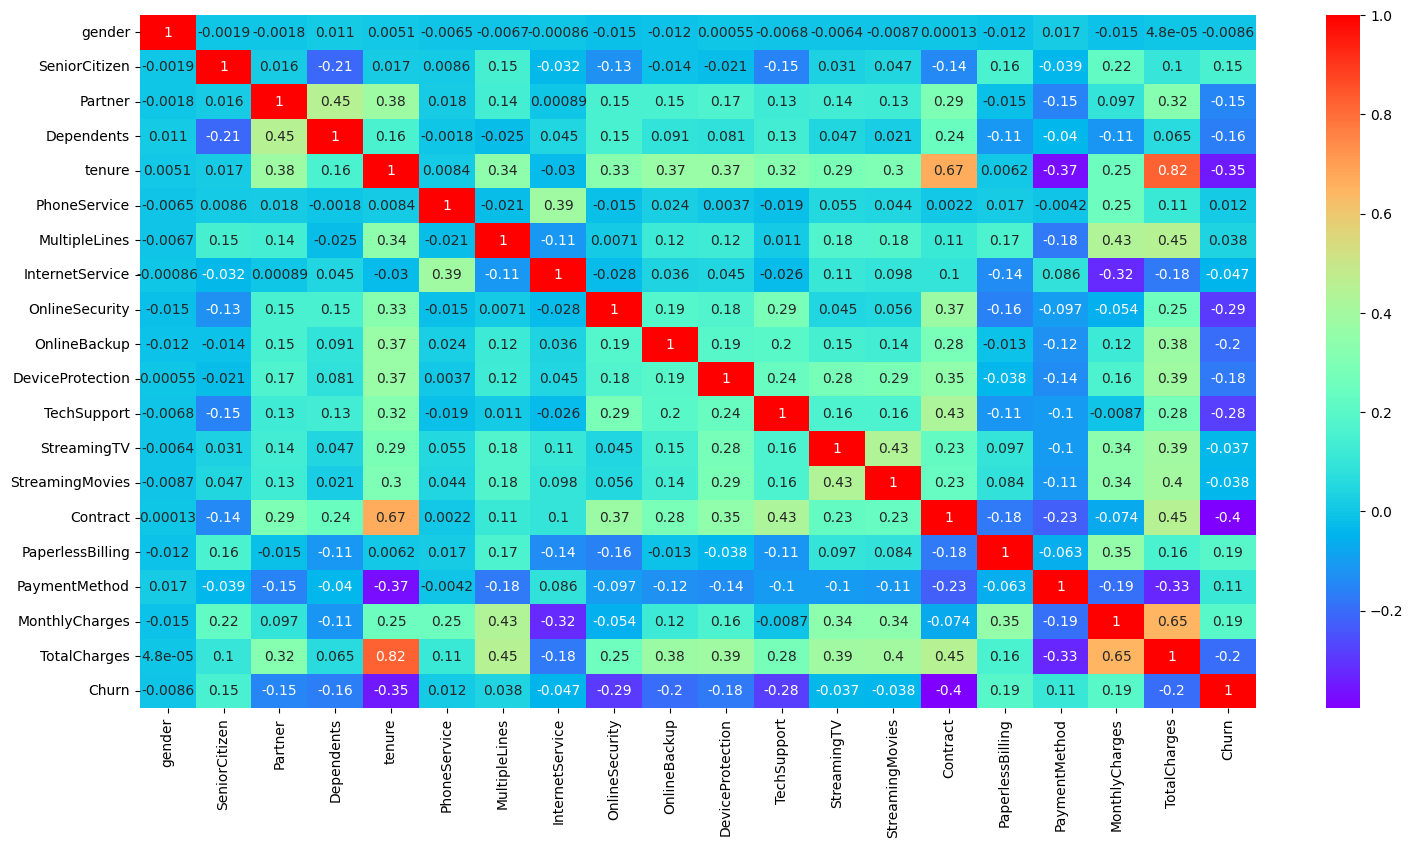

In [ ]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(), annot=True, cmap="rainbow")
plt.show()

## Feature Engineering and Selection:

In [ ]:
#seperating independent variables and target variable
x=df.drop("Churn",axis=1)
y=df["Churn"]

In [ ]:
x.shape

(7043, 19)

In [ ]:
#Selecting the 10 features which has higher correlation with churn
select_feature = SelectKBest(k=10)
select_feature.fit(x,y)

SelectKBest()

In [ ]:
features = select_feature.get_feature_names_out()
features

array(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges'], dtype=object)

In [ ]:
x = x[features]
x.shape

(7043, 10)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
def evaluate_model(model, test_data, y_test):
    prediction = model.predict(test_data)
    #print(f"Training Accurary : {model.score(x_train,y_train)}")
    print(f"Validation Accurary : {accuracy_score(y_test, prediction)*100:.2f} %")
    print(f"Precision Score : {precision_score(y_test, prediction)*100:.2f} %")
    print(f"Recall Score : {recall_score(y_test, prediction)*100:.2f} %")
    print(f"F1 Score : {f1_score(y_test, prediction)*100:.2f} %")
    print(classification_report(y_test, prediction))

In [ ]:
#Random Forest Model without balancing dataset and without hyper paramter tuning
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
evaluate_model(random_forest, x_test, y_test)

Validation Accurary : 79.21 %
Precision Score : 64.93 %
Recall Score : 46.65 %
F1 Score : 54.29 %
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
#GradientBoostingClassifier without balancing dataset and without hyper paramter tuning
gradient_boost = GradientBoostingClassifier( )
gradient_boost.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
evaluate_model(gradient_boost, x_test, y_test)

Validation Accurary : 80.55 %
Precision Score : 66.56 %
Recall Score : 53.35 %
F1 Score : 59.23 %
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



**Reasons for poor performance:**

Most machine learning algorithms assume data is equally distributed. So when we have a class imbalance, the machine learning classifier tends to be more biased towards the majority class, causing bad classification of the minority class.


**Possible Solutions:**

1.   We can restore some sort of balance on the training set by undersampling the large class or by oversampling the small class, to prevent bias from arising in the first place.

2.   Alternatively, we can modify the costs of misclassification to prevent bias.

3.   Another option is to replace the accuracy by something called the balanced accuracy. Balanced accuracy is the arithmetic mean of True Positive rate and True Negative rate i.e.

> $Balanced \: Accuracy = \frac{(TP\: / \:(TP \, + \, FN)) \; + \; (TN\: / \:(TN \, + \, FP))}{2}$









We will go for option 1 and the specific type of rebalancing algorithm we will use is Synthetic Minority Oversampling Technique and Edited Nearest Neighbour (**SMOTEENN**).


<u> SMOTE </u>

> SMOTE works by firstly selecting random data from the minority class. We then form a vector of the distance between a datapoint (from the randomly selected data) and its k nearest neighbours. Using a random number between 0 and 1, we generate a synthetic datapoint by multiplying the difference in the distance we just calculated with our random number and add it to the real datapoint we started with. This is repeated with the remaining datapoints in the randomly selected data until the desired proportion of minority class is met.  

<u> ENN </u>


> So now that we have a big pool of real and realistic synthetic data, we use ENN to ensure the desired proportion of each class is fulfilled. ENN works by finding the K-nearest neighbours of each observation first, then checking whether the majority class from the observation's k-nearest neighbors is the same as the observation's class or not. If the majority class of k-nearest neighbours is different from the observation class, that entry is removed. We should now be left with a fairly balanced dataset thats a mix of real and synthetic data.


In [ ]:
smote = SMOTEENN()
x_st, y_st = smote.fit_resample(x,y)

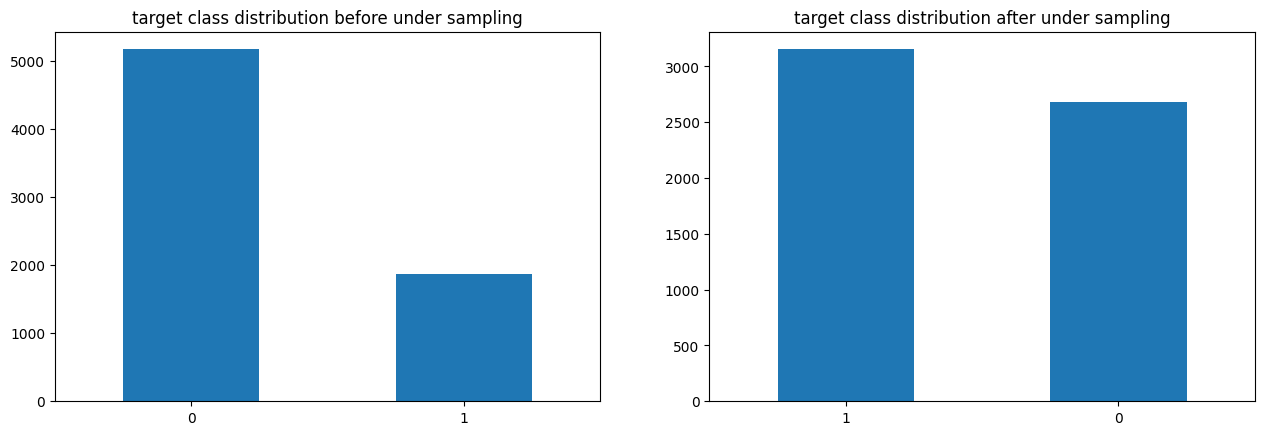

In [ ]:
#check the distibution of churn class
plt.subplot(121)
y.value_counts().plot(kind="bar")
plt.title("target class distribution before under sampling")
plt.xticks(rotation=0)
plt.subplot(122)
y_st.value_counts().plot(kind="bar")
plt.title("target class distribution after under sampling")
plt.xticks(rotation=0)
plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None, hspace=None)
plt.show()

In [ ]:
y_st.value_counts()

1    3153
0    2685
Name: Churn, dtype: int64

In [ ]:
#now split training and validation set using balanced dataset
x_st_train, x_st_test, y_st_train, y_st_test = train_test_split(x_st, y_st, test_size=0.2, random_state=42)

In [ ]:
x_st_train.shape, y_st_train.shape, x_st_test.shape, y_st_test.shape

((4670, 10), (4670,), (1168, 10), (1168,))

In [ ]:
parameter_grid = {'n_estimators':[40,80,120,160,200],
            'max_depth':[2,4,6,8,10],
            "criterion":['gini'],
            "random_state":[27,42,43]
            }

random_search_cv = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=parameter_grid, n_iter=12, cv=5, scoring='f1', verbose=1)
random_search_cv.fit(x_st_train, y_st_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=12,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'n_estimators': [40, 80, 120, 160, 200],
                                        'random_state': [27, 42, 43]},
                   scoring='f1', verbose=1)

In [ ]:
random_search_cv.best_params_

{'random_state': 27, 'n_estimators': 160, 'max_depth': 10, 'criterion': 'gini'}

In [ ]:
# Get final model with best parameters from RandomizedSearchCV
random_forest_final_model = random_search_cv.best_estimator_

In [ ]:
#evaluate Random Forest Classifier
evaluate_model(random_forest_final_model, x_st_test, y_st_test)

Validation Accurary : 94.86 %
Precision Score : 93.75 %
Recall Score : 96.28 %
F1 Score : 95.00 %
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       576
           1       0.94      0.96      0.95       592

    accuracy                           0.95      1168
   macro avg       0.95      0.95      0.95      1168
weighted avg       0.95      0.95      0.95      1168



In [ ]:
parameter_grid2 = {'n_estimators':[100, 150, 200, 250, 300],
             'criterion': ['friedman_mse', 'squared_error'],
              'max_depth': [2,4,6,8],
              'learning_rate': [0.001, 0.01, 0.1, 0.2],
              'loss': ['log_loss', 'exponential']
              }

In [ ]:
random_search_cv2 = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_distributions=parameter_grid2, n_iter=12, verbose=1, scoring='f1')
random_search_cv2.fit(x_st_train, y_st_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=12,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'loss': ['log_loss', 'exponential'],
                                        'max_depth': [2, 4, 6, 8],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   scoring='f1', verbose=1)

In [ ]:
random_search_cv2.best_params_

{'n_estimators': 250,
 'max_depth': 8,
 'loss': 'log_loss',
 'learning_rate': 0.2,
 'criterion': 'friedman_mse'}

In [ ]:
gradient_boost_final_model = random_search_cv2.best_estimator_

In [ ]:
evaluate_model(gradient_boost_final_model, x_st_test, y_st_test)

Validation Accurary : 96.06 %
Precision Score : 95.20 %
Recall Score : 97.13 %
F1 Score : 96.15 %
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       576
           1       0.95      0.97      0.96       592

    accuracy                           0.96      1168
   macro avg       0.96      0.96      0.96      1168
weighted avg       0.96      0.96      0.96      1168

